<a href="https://colab.research.google.com/github/tarannummuzaffar/super/blob/main/DL4CV_Prog_Assignment_3_Week_5_2024_Solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Welcome to Assignment 3 on Deep Learning for Computer Vision.**

This assignment is based on the content you learned in Week-5 of course.


#### **Instructions**
1. Use Python 3.x to run this notebook
2. Write your code only in between the lines 'YOUR CODE STARTS HERE' and 'YOUR CODE ENDS HERE'.
you should not change anything else in the code cells, if you do, the answers you are supposed to get at the end of this assignment might be wrong.
3. Read documentation of each function carefully.
4. All the Best!

##MNIST classification using CNN

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import torch.nn.functional as F
import timeit
import unittest

## Please DONOT remove these lines.
torch.manual_seed(2024)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
np.random.seed(2024)

### Data Loading and Pre-processing

In [ ]:
# check availability of GPU and set the device accordingly
#### YOUR CODE STARTS HERE ####
device =torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
#### YOUR CODE ENDS HERE ####

# Hyper parameters
num_epochs = 10
num_classes = 10
learning_rate = 0.001

# define a transforms for preparing the dataset
# for normalization of the MNIST dataset, take mean=0.1307 and std=0.3081

#### YOUR CODE STARTS HERE ####
transform = transforms.Compose([
        transforms.ToTensor(), # convert the image to a pytorch tensor
        transforms.Normalize((0.1307,), (0.3081,)) # normalise with mean and std of the dataset
        ])
#### YOUR CODE ENDS HERE ####

In [ ]:
# Load the MNIST training, test datasets using `torchvision.datasets.MNIST` using the transform defined above
#### YOUR CODE STARTS HERE ####
train_dataset =datasets.MNIST('./data', train=True, download=True,
                       transform=transform)
test_dataset = datasets.MNIST('./data', train=False, download=True,
                       transform=transform)
#### YOUR CODE ENDS HERE ####

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:04<00:00, 2028778.01it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 130441.10it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:01<00:00, 1046463.40it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 3009086.84it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [ ]:
# create dataloaders for training and test datasets
# use a batch size of 32 and set shuffle=True for the training set
#### YOUR CODE STARTS HERE ####
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=32)
#### YOUR CODE ENDS HERE ####


### Network Definition

In [ ]:
# Convolutional neural network (Two convolutional layers)
class ConvolutionNet(nn.Module):
    def __init__(self, num_classes=10):
        super( ConvolutionNet, self).__init__()

        # define a sequential module with
        # 1. conv layer with input channel as 1, output channels as 32, kernel size of 5, stride of 1 and padding 2
        # 2. 2D BatchNorm of 32 features
        # 3. ReLU activation
        # 4. 2D MaxPool with kernel size of 2 and stride of 2

        #### YOUR CODE STARTS HERE ####
        self.conv_block1 = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        #### YOUR CODE ENDS HERE ####

        # define a sequential module with
        # 1. conv layer with input channel as 32, output channels as 16, kernel size of 7, stride of 1 and padding 3
        # 2. 2D BatchNorm of 16 features
        # 3. ReLU activation
        # 4. 2D MaxPool with kernel size of 2 and stride of 2

        #### YOUR CODE STARTS HERE ####
        self.conv_block2 =nn.Sequential(
            nn.Conv2d(32, 16, kernel_size=7, stride=1, padding=3),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        #### YOUR CODE ENDS HERE ####

        # define a linear(dense) layer with output features corresponding to the number of classes in the dataset

        #### YOUR CODE STARTS HERE ####
        self.fc = nn.Linear(7*7*16, num_classes)
        #### YOUR CODE ENDS HERE ####

    def forward(self, x):
        # Use the sequential convolution blocks defined above (conv_block1--> conv_block2-->fc) and
        # write the forward pass.

        #### YOUR CODE STARTS HERE ####
        output = self.conv_block1(x)
        output = self.conv_block2(output)

        # Reshape appropiately
        output = output.reshape(output.size(0), -1)


        output = self.fc(output)
        #### YOUR CODE ENDS HERE ####
        return output


In [ ]:
model = ConvolutionNet(num_classes).to(device)
model.conv_block2[0].weight.shape

torch.Size([16, 32, 7, 7])

### Question 1

What is the size of parameter matrix corresponding to convolution layer of second sequential block ?

1. 32x16x5x5
2. 32x32x6x6
3. 16x32x7x7
4. 32x16x4x4

Answer (3)

### Training and Inference

In [ ]:
#define the model
#### YOUR CODE STARTS HERE ####
model = ConvolutionNet(num_classes).to(device)
#### YOUR CODE ENDS HERE ####


#define cross entropy loss and Adam optimizer using learning rate=learning_rate
#### YOUR CODE STARTS HERE ####
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
#### YOUR CODE ENDS HERE ####

# Train the model
total_step = len(train_dataloader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_dataloader):
       #### YOUR CODE STARTS HERE ####
        # send the image, target to the device
        images = images.to(device)
        labels = labels.to(device)

        # flush out the gradients stored in optimizer
        optimizer.zero_grad()
        # pass the image to the model and assign the output to variable named output
        output = model(images)
        # calculate the loss (use cross entropy in pytorch)
        loss = criterion(output, labels)
        # do a backward pass
        loss.backward()
        # update the weights
        optimizer.step()
       #### YOUR CODE ENDS HERE ####
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

# Test the model
model.eval()  # eval mode (batchnorm uses moving mean/variance instead of mini-batch mean/variance)
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_dataloader:
      ### YOUR CODE STARTS HERE ####
        # send the image, target to the device
        images = images.to(device)
        labels = labels.to(device)
        # pass the image to the model and assign the output to variable named output
        outputs = model(images)
      #### YOUR CODE ENDS HERE ####
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Test Accuracy of the model : {} %'.format(100 * correct / total))

Epoch [1/10], Step [100/1875], Loss: 0.1848
Epoch [1/10], Step [200/1875], Loss: 0.2183
Epoch [1/10], Step [300/1875], Loss: 0.1780
Epoch [1/10], Step [400/1875], Loss: 0.1038
Epoch [1/10], Step [500/1875], Loss: 0.0785
Epoch [1/10], Step [600/1875], Loss: 0.0381
Epoch [1/10], Step [700/1875], Loss: 0.0601
Epoch [1/10], Step [800/1875], Loss: 0.1580
Epoch [1/10], Step [900/1875], Loss: 0.0632
Epoch [1/10], Step [1000/1875], Loss: 0.0103
Epoch [1/10], Step [1100/1875], Loss: 0.0057
Epoch [1/10], Step [1200/1875], Loss: 0.0037
Epoch [1/10], Step [1300/1875], Loss: 0.0240
Epoch [1/10], Step [1400/1875], Loss: 0.0261
Epoch [1/10], Step [1500/1875], Loss: 0.0034
Epoch [1/10], Step [1600/1875], Loss: 0.0068
Epoch [1/10], Step [1700/1875], Loss: 0.0047
Epoch [1/10], Step [1800/1875], Loss: 0.0061
Epoch [2/10], Step [100/1875], Loss: 0.0135
Epoch [2/10], Step [200/1875], Loss: 0.0040
Epoch [2/10], Step [300/1875], Loss: 0.0078
Epoch [2/10], Step [400/1875], Loss: 0.0081
Epoch [2/10], Step [500

#### Question-2

Report the final test accuracy displayed above (If you are not getting the exact number shown in options, please report the closest number).
1. 84%
2. 76%
3. 99%
4. 57%

Answer- (3)

#### Question-3

Report the loss value at the step 1800? (If you are not getting the exact number shown in options, please report the closest number).
1. 0.0042
2. 0.15
3. 0.00065
4. 1.4

Answer- (1)

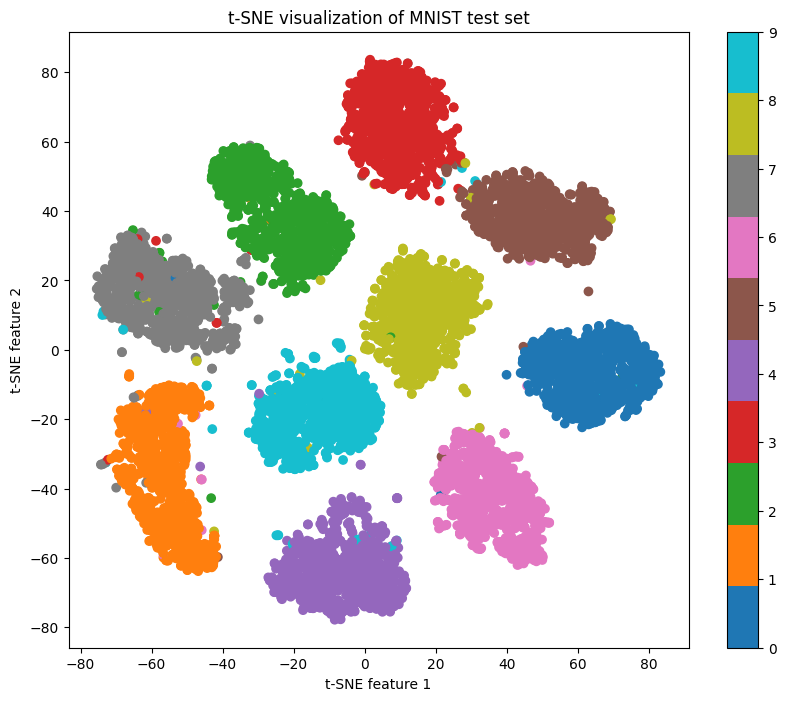

In [ ]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Function to get embeddings
def get_embeddings(model, dataloader, device):
    ### YOUR CODE STARTS HERE ####
    model.eval()
    embeddings = []
    labels = []
    with torch.no_grad():
        for images, batch_labels in dataloader:
            images = images.to(device)
            # Get the output of the second-to-last layer (before the final fully connected layer)
            embedding = model.conv_block2(model.conv_block1(images))
            embedding = embedding.view(images.size(0), -1)
            embeddings.append(embedding.cpu().numpy())
            labels.append(batch_labels.numpy())

    #### YOUR CODE ENDS HERE
    return np.vstack(embeddings), np.concatenate(labels)

# Get embeddings for the test set
test_embeddings, test_labels = get_embeddings(model, test_dataloader, device)

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(test_embeddings)

# Visualize the results
plt.figure(figsize=(10, 8))
scatter = plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=test_labels, cmap='tab10')
plt.colorbar(scatter)
plt.title('t-SNE visualization of MNIST test set')
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')
plt.show()

#### Question-4

Embedding of which class/digit is closest to the embedding of 7?
1. 3
2. 5
3. 8
4. 1

Answer- (4)

#### Question-5

Embedding of which class/digit is farthest to the embedding of 4?
1. 1
2. 6
3. 9
4. 3

Answer- (4)

shape of the filters is: (32, 1, 5, 5)


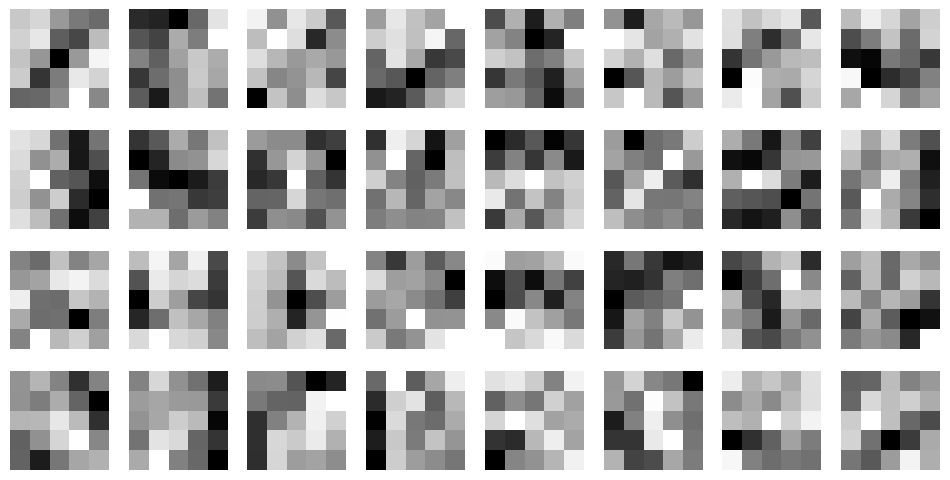

In [ ]:
import matplotlib.pyplot as plt

# Get the weights of the first convolutional layer
filters = model.conv_block1[0].weight.data.cpu().numpy()

print(f"shape of the filters is: {filters.shape}")

# Normalize the filters for better visualization
min_val = filters.min()
max_val = filters.max()
filters = (filters - min_val) / (max_val - min_val)

# Plot the filters
fig, axes = plt.subplots(4, 8, figsize=(12, 6))

for i, ax in enumerate(axes.flat):
    if i < filters.shape[0]:
        # Each filter is in the shape of (out_channels, in_channels, height, width)
        # We take the first in_channel (0) since it's grayscale, so only one channel exists
        ax.imshow(filters[i, 0, :, :], cmap='gray')
        ax.axis('off')
    else:
        ax.axis('off')

plt.show()


#### Question-5

What is the shape of filters variable?
1. (32,16 , 5, 5)
2. (32, 1, 5, 5)
3. (16, 32, 5, 5)
4. (16, 1)

Answer- (2)